In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv("data/mouse_drug_data.csv")
trial_data = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
data = pd.merge(trial_data, mouse_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [21]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_grouped_tum_volume = data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
tumor_volume_mean = pd.DataFrame(drug_grouped_tum_volume).reset_index()
tumor_vol_mean_piv = tumor_volume_mean.pivot(index = "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]
tumor_vol_mean_piv.min()

Drug
Capomulin    36.236114
Ceftamin     45.000000
Infubinol    45.000000
Ketapril     45.000000
Naftisol     45.000000
Placebo      45.000000
Propriva     45.000000
Ramicane     34.955595
Stelasyn     45.000000
Zoniferol    45.000000
dtype: float64

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_sem = data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
tumor_vol_sem = pd.DataFrame(tumor_vol_sem).reset_index()
tumor_vol_sem_piv = tumor_vol_sem.pivot(index = "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]
tumor_vol_sem_piv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


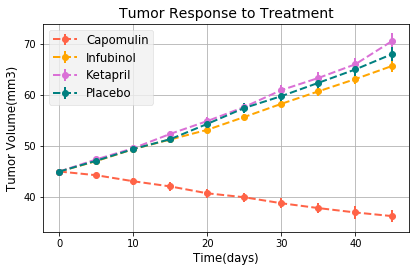

In [4]:
time = tumor_vol_mean_piv.index
handles = ["Capomulin","Infubinol","Ketapril", "Placebo"]
plt.errorbar(time, tumor_vol_mean_piv["Capomulin"], yerr = tumor_vol_sem_piv["Capomulin"], fmt = "o", linestyle = "--", linewidth = 2, color = "tomato", elinewidth = 2)
plt.errorbar(time, tumor_vol_mean_piv["Infubinol"], yerr = tumor_vol_sem_piv["Infubinol"], fmt = "o", linestyle = "--", linewidth = 2, color = "orange", elinewidth = 2)
plt.errorbar(time, tumor_vol_mean_piv["Ketapril"], yerr = tumor_vol_sem_piv["Ketapril"], fmt = "o", linestyle = "--", linewidth = 2, color = "orchid", elinewidth = 2)
plt.errorbar(time, tumor_vol_mean_piv["Placebo"], yerr = tumor_vol_sem_piv["Placebo"], fmt = "o", linestyle = "--", linewidth = 2, color = "teal", elinewidth = 2)

plt.style.use("fivethirtyeight")
plt.title("Tumor Response to Treatment", fontsize = 'medium')
plt.xlabel("Time(days)",fontsize = 'small')
plt.ylabel("Tumor Volume(mm3)",fontsize = 'small')
plt.grid(True)
plt.legend(handles, loc = "best", fontsize = 'small')
plt.tight_layout()
plt.savefig("plot1.png")
plt.show()

## Metastatic Response to Treatment

In [17]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_response = pd.DataFrame(data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"])
met_response = met_response.reset_index().pivot(index = "Timepoint", columns = "Drug")["Metastatic Sites"]
met_response.max()

Drug
Capomulin    1.476190
Ceftamin     2.692308
Infubinol    2.111111
Ketapril     3.363636
Naftisol     2.538462
Placebo      3.272727
Propriva     2.777778
Ramicane     1.250000
Stelasyn     1.727273
Zoniferol    3.071429
dtype: float64

In [6]:
met_response_sem = pd.DataFrame(data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"])
met_response_sem = met_response_sem.reset_index()
met_response_sem = met_response_sem.pivot(index = "Timepoint", columns = "Drug")["Metastatic Sites"]
met_response_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


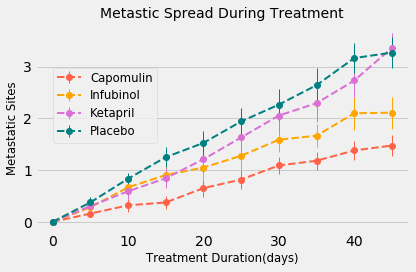

In [7]:
time = met_response.index
handles = ["Capomulin","Infubinol","Ketapril", "Placebo"]
plt.errorbar(time,met_response["Capomulin"], yerr = met_response_sem["Capomulin"], fmt = "o", linestyle = "--", linewidth = 2, color = "tomato", elinewidth = 1)
plt.errorbar(time,met_response["Infubinol"], yerr = met_response_sem["Infubinol"], fmt = "o", linestyle = "--", linewidth = 2, color = "orange", elinewidth = 1)
plt.errorbar(time,met_response["Ketapril"], yerr = met_response_sem["Ketapril"], fmt = "o", linestyle = "--", linewidth = 2, color = "orchid", elinewidth = 1)
plt.errorbar(time,met_response["Placebo"], yerr = met_response_sem["Placebo"], fmt = "o", linestyle = "--", linewidth = 2, color = "teal", elinewidth = 1)

plt.style.use("fivethirtyeight")
plt.title("Metastic Spread During Treatment", fontsize= 'medium')
plt.xlabel("Treatment Duration(days)", fontsize = 'small')
plt.ylabel("Metastatic Sites", fontsize = 'small')
plt.grid(axis='x')
plt.legend(handles, loc = "best", fontsize= 'small', bbox_to_anchor=(0.03,0.4, .3, .1))
plt.tight_layout()
plt.savefig("plot2.png")
plt.show()


## Survival Rates

In [19]:
survival_count = data.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]
survival_count = pd.DataFrame({"Survivor Count":survival_count})
survival_count = survival_count.reset_index()
survival_count = survival_count.pivot(index = "Timepoint", columns = "Drug")["Survivor Count"]
survival_count.min()

Drug
Capomulin    21
Ceftamin     13
Infubinol     9
Ketapril     11
Naftisol     13
Placebo      11
Propriva      7
Ramicane     20
Stelasyn     11
Zoniferol    14
dtype: int64

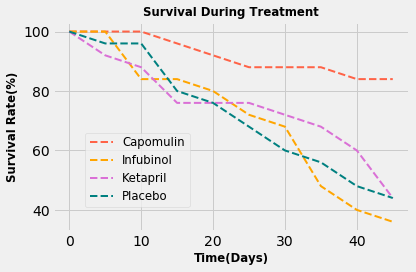

In [10]:

handles = ["Capomulin","Infubinol","Ketapril", "Placebo"]
plt.plot((survival_count["Capomulin"]*100)/25, linestyle = "--", linewidth = 2, color = "tomato")
plt.plot((survival_count["Infubinol"]*100)/25, linestyle = "--", linewidth = 2, color = "orange")
plt.plot((survival_count["Ketapril"]*100)/25, linestyle = "--", linewidth = 2, color = "orchid")
plt.plot((survival_count["Placebo"]*100)/25, linestyle = "--", linewidth = 2, color = "teal")

plt.style.use("fivethirtyeight")
plt.title("Survival During Treatment", fontsize= 'small', fontweight = 'semibold')
plt.xlabel("Time(Days)", fontsize = 'small',fontweight = 'semibold')
plt.ylabel("Survival Rate(%)",fontsize = 'small',fontweight = 'semibold')
plt.grid(True)
plt.legend(handles, loc = "left", fontsize= 'small', fancybox = True, bbox_to_anchor=(0.1,0.3, 0.3, 0.2))
plt.tight_layout()
plt.savefig("plot3.png")
plt.show()


## Summary Bar Graph

In [11]:
change = (tumor_vol_mean_piv.iloc[-1] - tumor_vol_mean_piv.iloc[0])/ tumor_vol_mean_piv.iloc[0] * 100
#drug changes relevant to visualization
net_change = change.iloc[0:6]
mask = net_change.index.isin(['Naftisol', 'Ceftamin'])
net_change = pd.DataFrame({"Net Change":net_change.loc[~mask]})
net_change.reset_index()

,Drug,Net Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


In [12]:
change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

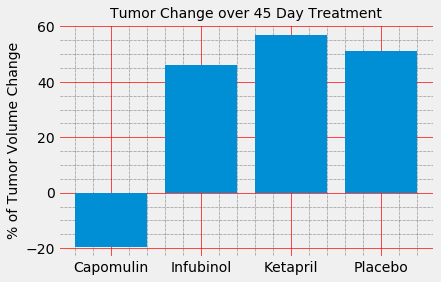

In [13]:
drug = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
change = [-19.47530267, 46.12347173, 57.02879469, 51.29796048]
plt.bar(drug, change)
plt.ylabel("% of Tumor Volume Change", size = "medium")
plt.title("Tumor Change over 45 Day Treatment", size = "medium")
plt.xticks(drug)
# Turn on the grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.7', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [14]:
change = (tumor_vol_mean_piv.iloc[-1] - tumor_vol_mean_piv.iloc[0])/ tumor_vol_mean_piv.iloc[0] * 100
change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [15]:
change = (tumor_vol_mean_piv.iloc[-1] - tumor_vol_mean_piv.iloc[0])/ tumor_vol_mean_piv.iloc[0] * 100

netchange = (change['Capomulin'],
             change['Infubinol'],
             change['Ketapril'],
             change['Placebo'])

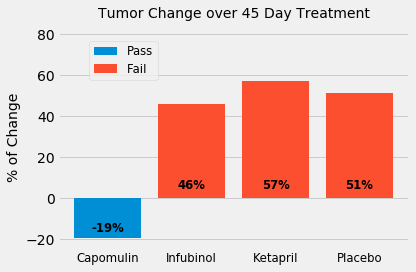

In [16]:
change = (tumor_vol_mean_piv.iloc[-1] - tumor_vol_mean_piv.iloc[0])/ tumor_vol_mean_piv.iloc[0] * 100

netchange = (change['Capomulin'],
             change['Infubinol'],
             change['Ketapril'],
             change['Placebo'])

labels = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
handles = ["Pass", "Fail"]
label_loc = np.arange(len(labels))  
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rectspass = ax.bar(label_loc[0], netchange[0])
rectsfail = ax.bar(label_loc[1:], netchange[1:])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of Change', size = "medium")
ax.set_ylim(-25, 85)
ax.set_title('Tumor Change over 45 Day Treatment', size = "medium")
ax.set_xticks(label_loc)
ax.set_xticklabels(labels, size = "small", weight = 'regular')
ax.set_autoscaley_on(False)
ax.legend(handles, loc = "left", fontsize= 'small', fancybox = True, bbox_to_anchor=(0,0.75, 0.3, 0.2))
ax.grid(axis = 'x')


def autolabelpass(rects):
    """Attach percentage of change to each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -18,
        '%d%%' % int(height),
        ha='center', va='bottom',
        color = "black", size = "small", weight = 'semibold')

def autolabelfail(rects):
    """Attach percentage of change to each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
        '%d%%' % int(height),
        ha='center', va='bottom',
        color = "black", size = "small", weight = 'semibold')

autolabelpass(rectspass)
autolabelfail(rectsfail)


plt.tight_layout()
plt.savefig("plot4.png")
plt.show()
